In [1]:
import json
from tqdm import tqdm
import eunomia
import numpy as np
import matplotlib.pyplot as plt

C:\Users\mehra\anaconda3\envs\elm\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
LLM_model = 'gpt-3.5-turbo-16k' #'gpt-3.5-turbo-16k'
Embedding_model = 'text-davinci-003' #'text-davinci-003'
k = 8
temp = 0


predictions_list = []
for i in tqdm(range(1,112)):
    results_index_path = f"../Data/faiss/results/{LLM_model}/faiss-{Embedding_model}/k_{k}/t_{temp}/two-step/results_paper_{i}.json"
    with open(results_index_path, 'rb') as f:
        paper_result = json.load(f)
    predictions_list.append(paper_result)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:01<00:00, 86.14it/s]


In [4]:
predictions_list[1]

{'Zn-MOF-74': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'MOF-508b': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Zn-BDC-DABCO': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'HKUST-1': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Cr-MIL-101': {'Predicted Stability': 'Stable', 'Paper id': '2'},
 'Al-MIL-110': {'Predicted Stability': 'Not provided', 'Paper id': '2'}}

In [5]:
def parse_ground_truth():
    import pandas as pd
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel('../Result/Excel/Standard_Criteria_Binary.xlsx', engine='openpyxl')
    # Replace column names with corrected names
    df.columns = df.columns.str.replace('_x0002_', ' ')

    df = df[['MOF contained', 'True Water Stability', 'Reference #']]
    df = df.rename(columns={'MOF contained': 'MOF name', 'True Water Stability': 'Ground-truth Stability',
                            'Reference #': 'Paper id'})
    ground_truth_list = []
    for _, group in df.groupby("Paper id"):
        mofs = {
            row["MOF name"]: {
                "Ground-truth Stability": row["Ground-truth Stability"],
                "Paper id": str(row["Paper id"])
            }
            for _, row in group.iterrows()
        }
        ground_truth_list.append(mofs)
    return ground_truth_list

ground_truth_list = parse_ground_truth()

In [6]:
paper_id = 12
prediction_dict = predictions_list[paper_id]  
ground_truth_dict = ground_truth_list[paper_id]
print(prediction_dict)
print(ground_truth_dict)
eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=90)

{'Ni3(BTP)2': {'Predicted Stability': 'Stable', 'Paper id': '13'}, 'Cu3(BTP)2': {'Predicted Stability': 'Stable', 'Paper id': '13'}, 'Zn3(BTP)2': {'Predicted Stability': 'Stable', 'Paper id': '13'}, 'Co3(BTP)2': {'Predicted Stability': 'Stable', 'Paper id': '13'}}
{'Ni3(BTP)2': {'Ground-truth Stability': 'Stable', 'Paper id': '13'}, 'Cu3(BTP)2': {'Ground-truth Stability': 'Stable', 'Paper id': '13'}, 'Zn3(BTP)2': {'Ground-truth Stability': 'Stable', 'Paper id': '13'}}


({'Ni3(BTP)2': {'Predicted Stability': 'Stable',
   'Paper id': '13',
   'Ground-truth Stability': 'Stable'},
  'Cu3(BTP)2': {'Predicted Stability': 'Stable',
   'Paper id': '13',
   'Ground-truth Stability': 'Stable'},
  'Zn3(BTP)2': {'Predicted Stability': 'Stable',
   'Paper id': '13',
   'Ground-truth Stability': 'Stable'}},
 [('Ni3(BTP)2', 'Ni3(BTP)2'),
  ('Cu3(BTP)2', 'Cu3(BTP)2'),
  ('Zn3(BTP)2', 'Zn3(BTP)2')])

In [7]:
paper_id = 5
prediction_dict = predictions_list[paper_id]  
ground_truth_dict = ground_truth_list[paper_id]
print(f'{prediction_dict}\n')
print(ground_truth_dict)
eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=80)

{'MIL-100': {'Predicted Stability': 'Stable', 'Paper id': '6'}, 'MIL-101': {'Predicted Stability': 'Stable', 'Paper id': '6'}}

{'MIL-101(Cr)': {'Ground-truth Stability': 'Stable', 'Paper id': '6'}, 'MIL-100(Fe)': {'Ground-truth Stability': 'Stable', 'Paper id': '6'}}


({'MIL-100': {'Predicted Stability': 'Stable',
   'Paper id': '6',
   'Ground-truth Stability': 'Stable'},
  'MIL-101': {'Predicted Stability': 'Stable',
   'Paper id': '6',
   'Ground-truth Stability': 'Stable'}},
 [('MIL-100', 'MIL-100(Fe)'), ('MIL-101', 'MIL-101(Cr)')])

In [8]:
paper_id = 1
prediction_dict = predictions_list[paper_id]  
ground_truth_dict = ground_truth_list[paper_id]
print(f'{prediction_dict}\n')
print(ground_truth_dict)
eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=10)

{'Zn-MOF-74': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'MOF-508b': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'Zn-BDC-DABCO': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'HKUST-1': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'Cr-MIL-101': {'Predicted Stability': 'Stable', 'Paper id': '2'}, 'Al-MIL-110': {'Predicted Stability': 'Not provided', 'Paper id': '2'}}

{'MIL-101(Cr)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'ZIF-8': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'MIL-53(Al)': {'Ground-truth Stability': 'Stable', 'Paper id': '2'}, 'HKUST-1': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'Zn-MOF-74': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MIL-110(Al)': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-5': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-508': {'Ground-truth Stability': 'Unstable', 'Paper id': '2'}, 'MOF-69C': {'Ground-truth Stability': 'Unstable', 'P

({'Zn-MOF-74': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'MOF-508b': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'Zn-BDC-DABCO': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'HKUST-1': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'},
  'Cr-MIL-101': {'Predicted Stability': 'Stable',
   'Paper id': '2',
   'Ground-truth Stability': 'Stable'},
  'Al-MIL-110': {'Predicted Stability': 'Not provided',
   'Paper id': '2',
   'Ground-truth Stability': 'Unstable'}},
 [('Zn-MOF-74', 'Zn-MOF-74'),
  ('MOF-508b', 'MOF-508'),
  ('Zn-BDC-DABCO', 'MOF-69C'),
  ('HKUST-1', 'HKUST-1'),
  ('Cr-MIL-101', 'MIL-101(Cr)'),
  ('Al-MIL-110', 'MIL-110(Al)')])

In [9]:
def eval_single_paper_results(combined_dict):
    y = []
    y_hat = []
    not_provided_count = 0
    for k, v in combined_dict.items():
        if v['Predicted Stability'] != 'Not provided':
            if v['Ground-truth Stability'] == 'Stable':
                y.append(1)
            else:
                y.append(0)
            if v['Predicted Stability'] == 'Stable':
                y_hat.append(1)
            else:
                y_hat.append(0)
        else:
            not_provided_count += 1
    return y, y_hat, not_provided_count
        

In [10]:
sim_threshold = 15
y_values = []
y_hat_values = []
not_provided_count_values = []
matched_pairs_list = []
number_of_mofs_in_paper = []
number_of_mofs_matched_in_paper = []
for i in tqdm(range(0,111)): 
    prediction_dict = predictions_list[i]
    ground_truth_dict = ground_truth_list[i]
    combined_dict, matched_pairs = eunomia.match_MOF_names(prediction_dict, ground_truth_dict, threshold=sim_threshold)
    y, y_hat, not_provided_count = eval_single_paper_results(combined_dict)
    y_values.append(y)
    y_hat_values.append(y_hat)
    not_provided_count_values.append(not_provided_count)
    matched_pairs_list.append(matched_pairs)
    unique_mofs_in_paper = len(ground_truth_dict.keys())
    number_of_mofs_in_paper.append(unique_mofs_in_paper)
    number_of_mofs_matched_in_paper.append(len(combined_dict.keys()))
#     break

y_values = [item for sublist in y_values for item in sublist]
y_hat_values = [item for sublist in y_hat_values for item in sublist]
not_provided_counts = np.sum(not_provided_count_values)
total_mofs = np.sum(number_of_mofs_in_paper)
total_mofs_matched = np.sum(number_of_mofs_matched_in_paper)
print(total_mofs, total_mofs_matched)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 1009.12it/s]

283 259


In [11]:
matched_pairs_list

[[('bio-MOF-11', 'Bio-MOF-11'),
  ('bio-MOF-12', 'Bio-MOF-12'),
  ('bio-MOF-13', 'Bio-MOF-13'),
  ('bio-MOF-14', 'Bio-MOF-14')],
 [('Zn-MOF-74', 'Zn-MOF-74'),
  ('MOF-508b', 'MOF-508'),
  ('Zn-BDC-DABCO', 'MOF-69C'),
  ('HKUST-1', 'HKUST-1'),
  ('Cr-MIL-101', 'MIL-101(Cr)'),
  ('Al-MIL-110', 'MIL-110(Al)')],
 [('MIL-101', 'MIL-101(Cr)'),
  ('MIL-101-NO2', 'MIL-101\n-NO2(Cr)'),
  ('MIL-101-NH2', 'MIL-101\n-NH2(Cr)'),
  ('MIL-101-SO3H', 'MIL-101\n-SO3H(Cr)')],
 [('HKUST-1', 'HKUST-1'),
  ('ZIF-8', 'ZIF-8'),
  ('MIL-101', 'MIL-101(Cr)'),
  ('MIL-100(Fe)', 'MIL-100(Fe)')],
 [('MIL-101', 'MIL-101(Cr)')],
 [('MIL-100', 'MIL-100(Fe)'), ('MIL-101', 'MIL-101(Cr)')],
 [('MIL-101', 'MIL-101(Cr)')],
 [('MIL-101', 'MIL-101(Cr)')],
 [('MIL-100', 'MIL-101(Cr)')],
 [('MIL-101', 'MIL-101\n-SO3H(Cr)')],
 [('MIL-96(Al)', 'MIL-96(Al)')],
 [('ZIF-8', 'MIL-96(Al)'),
  ('ZIF-74', 'MIL-100(Al)'),
  ('ZIF-90', 'MIL-110 (Al)')],
 [('Ni3(BTP)2', 'Ni3(BTP)2'),
  ('Cu3(BTP)2', 'Cu3(BTP)2'),
  ('Zn3(BTP)2', 'Zn3(BT

Classification accuracy: 0.748, % MOF identified: 91.519


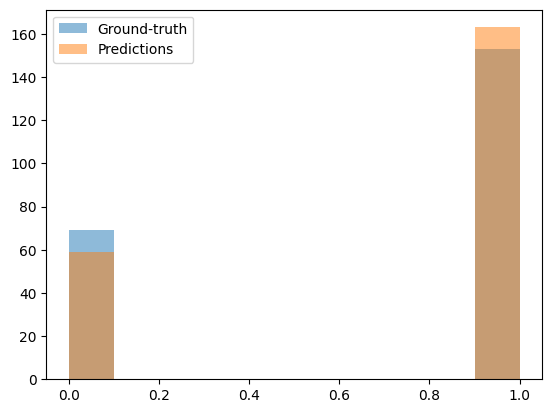

In [12]:
from sklearn.metrics import accuracy_score
# Calculate Accuracy
acc = accuracy_score(y_values, y_hat_values)
mof_indetified = (total_mofs_matched/total_mofs) * 100

print(f"Classification accuracy: {acc:.03f}, % MOF identified: {mof_indetified:.03f}")

plt.hist(y_values, label='Ground-truth', alpha=0.5)
plt.hist(y_hat_values, label='Predictions', alpha=0.5)
plt.legend()

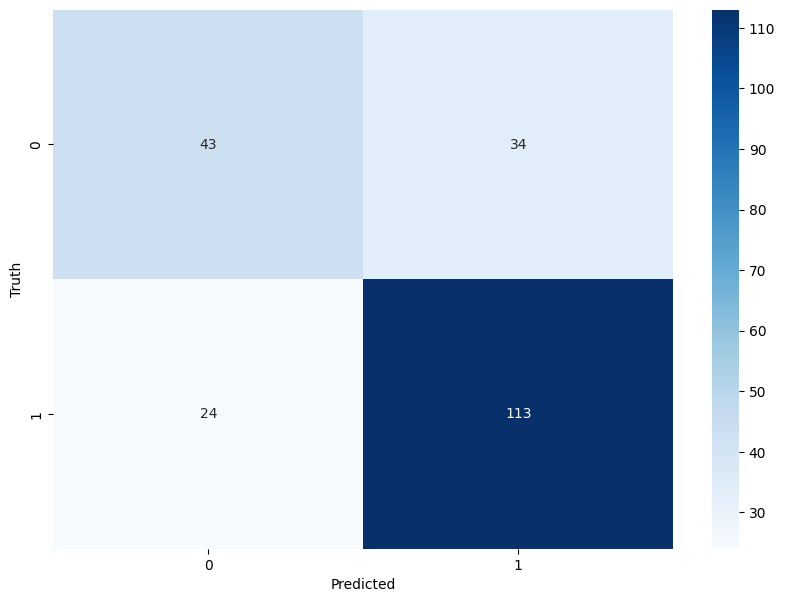

In [12]:

import seaborn as sns
from sklearn.metrics import confusion_matrix


# Confusion Matrix
cm = confusion_matrix(y_values, y_hat_values)

plt.figure(figsize=(10,7))

# Using seaborn to plot heatmap, annot=True to annotate the numbers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

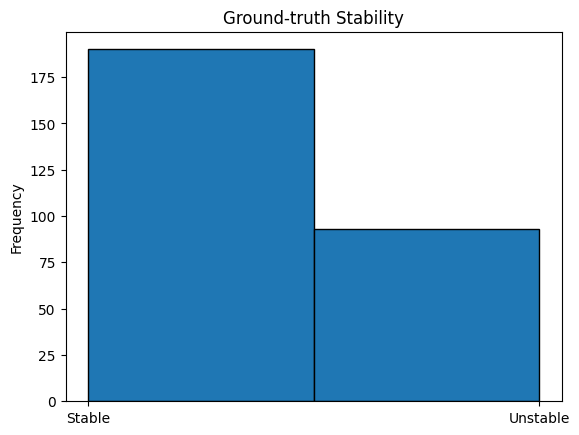

In [13]:
import matplotlib.pyplot as plt

# Extract Ground-truth Stability values
stability_values = [v['Ground-truth Stability'] for d in ground_truth_list for v in d.values()]

# Create histogram
plt.hist(stability_values, bins=2, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Ground-truth Stability')
plt.show()